In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fqtoolkit import dgToDf as dtd
import statsmodels.api as sm
import riskfolio as rp

import warnings
warnings.filterwarnings('ignore')

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [5]:
assets, liability, sale, income, price = [item[1] for item in dtd("data2.xlsx", "Sheet1", 5).items()]

In [100]:
df = pd.DataFrame()
for i in range(0,len(assets[:-5]),12):
    df = df.append(assets.iloc[i])
df_change = df.pct_change()
df_change = df_change[1:]
X = df_change.dropna(axis=1)
X.head()

,삼성전자,SK하이닉스,NAVER,삼성SDI,현대차,카카오,기아,POSCO홀딩스,삼성물산,현대모비스,...,케이엠더블유,대주전자재료,현대바이오,하림지주,아프리카TV,안랩,네이처셀,주성엔지니어링,SFA반도체,NICE평가정보
2001-01-31,0.122645,-0.322773,0.263845,-0.005784,0.246507,0.577594,0.111413,-0.036797,0.144932,0.126510,...,-0.437714,-0.002866,0.182361,0.466203,5.002297,3.671626,-0.200443,0.064590,0.646856,0.331523
2002-01-31,0.246381,-0.225743,1.721524,0.016745,0.152316,0.120577,0.102205,-0.016928,0.206286,0.194587,...,-0.152459,-0.123533,1.642804,0.075034,0.103526,-0.132935,-0.052735,-0.344538,0.161284,0.053293
2003-01-31,0.047521,-0.229021,0.602828,0.119598,0.162831,0.305068,0.249474,0.088678,0.045645,0.223418,...,-0.126374,0.221191,0.209130,-0.000005,0.870995,0.182165,-0.436616,-0.158697,0.855440,0.137948
2004-01-31,0.014151,0.028246,0.850388,0.048765,0.086030,0.909600,0.065606,0.161803,0.320367,0.314396,...,-0.063719,0.564596,-0.073188,-0.118709,-0.053809,-0.011559,-0.096193,0.360375,0.245823,-0.002305
2005-01-31,0.079084,0.209160,0.092174,-0.003237,0.138835,0.074517,0.113516,0.140012,0.011051,0.236263,...,-0.221381,0.095253,0.026844,0.223846,0.389499,0.175643,0.207520,0.161515,0.540896,0.160910


In [160]:
from plot_dendrogram import plot_dendrogram

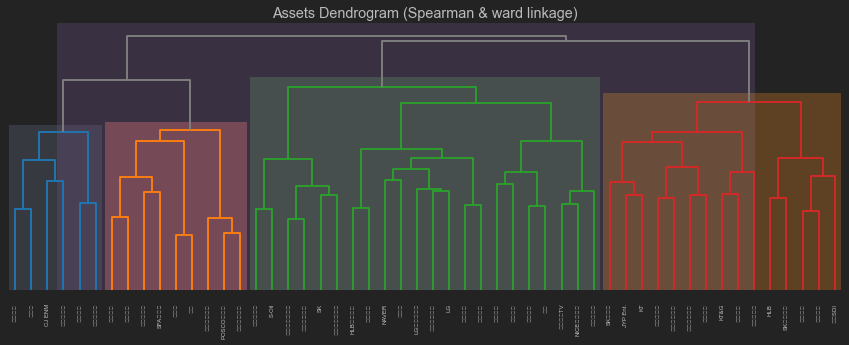

In [161]:
ax,an = plot_dendrogram(returns=X, codependence='spearman',
                        linkage='ward', k=None, max_k=5,
                        leaf_order=True, ax=None)
ax;

In [1]:
color = list(set(an['leaves_color_list']))
new_df = pd.DataFrame()
new_df['0'] = an['leaves']
new_df['1'] = an['leaves_color_list']
new_df = new_df.sort_values(by=['0'])
new_df['2'] = X.columns

li = []
for i in color:
    li.append(new_df[new_df['1']==i])
li[0]

NameError: name 'an' is not defined

### 검증

In [149]:
from folio import price
import yfinance as yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


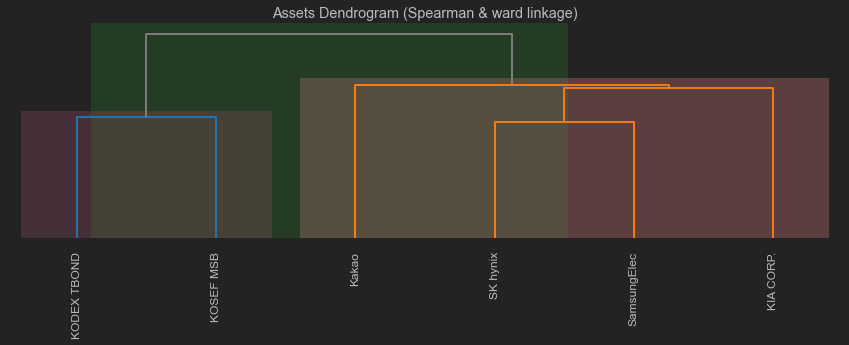

In [151]:
# 초기 세팅
start = '2001-01-01'
end = '2022-01-01'
stocks = ["005930.KS", "000270.KS", "000660.KS","035720.KS"]
bonds = ['122260.KS', '114260.KS']
# 122260.KS (1년물 채권)
# 114260.KS (3년물 채권)
# 397420.KS (5년물 채권)
assets = stocks + bonds

df = price(assets, start, end)
Y = df[assets].pct_change().dropna()

Y.columns = list(info(yf.Ticker(i))['shortName'] for i in Y.columns)

ax,an = plot_dendrogram(returns=Y, codependence='spearman',
                        linkage='ward', k=None, max_k=5,
                        leaf_order=True, ax=None)